# 4. Training Models

- training model = setting its parameters so that the model best fits the training set

## 4-1. Linear Regression

1. Linear Regression model prediction  
    - θ_0: bias term
    - x_0: always equal to zero  
    <img src = "https://www.oreilly.com/library/view/hands-on-machine-learning/9781491962282/assets/eq_11.png" width="25%" height="25%" align="left"><br>  
    <img src = "https://www.oreilly.com/library/view/hands-on-machine-learning/9781491962282/assets/eq_12.png" width="15%" height="15%" align ="left"><br>  
<br>
2. MSE cost function for a Linear Regression model<br>
    <img src = "https://www.oreilly.com/library/view/hands-on-machine-learning/9781491962282/assets/eq_18.png" width="25%" height="25%" align ="left"><br>
<br><br>    

3. The Normal Equation  
> usage: **good for less features, many instances**  

    - normal equation: closed-form equation; a mathematical equation that gives the result directly  
    <img src = "https://www.oreilly.com/library/view/hands-on-machine-learning/9781491962282/assets/eq_19.png" width="15%" height="15%" align = "left"><br><br>
    - Positive:   
        1) equation is linear with regards to the **# of instances** in the training set; O(m)  
        -> handles large training sets efficiently  
        2) Once trained, predictions are very fast. computational complexity is linear with regards to both # of instances and # of features.(i.e. instance # twice -> time twice)       
    - Negative:   
        1) gest very slow when the number of **features** grow large; O(n^3)  
        inversing cost is high. X.T * X -> (n, n) shape. n: # of features  

theta_best: [[3.80376336]
 [2.96988319]]
y_predict: [[3.80376336]
 [9.74352973]]


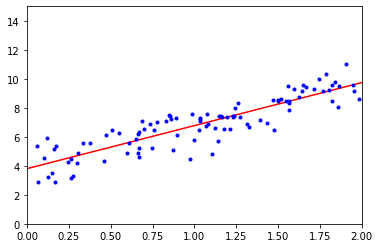

In [4]:
# 3-1. Normal Equation w/o scikit-linear
import numpy as np
import matplotlib.pyplot as plt
X = 2 * np.random.rand(100, 1) # 
y = 4 + 3 * X + np.random.randn(100, 1) #

# training: use normal equation
X_b = np.c_[np.ones((100, 1)), X] # add x0 = 1 to each instance; bias
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y) 
theta_best #  similar with answer theta [4, 3]
print(f'theta_best: {theta_best}')

# sample prediction
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2,1)), X_new]
y_predict = X_new_b.dot(theta_best)
print(f'y_predict: {y_predict}')

# plotting
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [3]:
# 3-2. Normal Equation w scikit-linear
from sklearn.linear_model import LinearRegression

#train
lin_reg = LinearRegression()
lin_reg.fit(X, y)
print(f'{lin_reg.intercept_, lin_reg.coef_}')
   
#predict
X_new = np.array([[0], [2]]) # do not need to add bias x_0
print(lin_reg.predict(X_new))

(array([3.9102045]), array([[3.16203789]]))
[[ 3.9102045 ]
 [10.23428029]]


## 4-2. Gradient Descent

- **when using Gradient Descent, ensure that all features have a similar scale(e.g. *StandardScaler class*). Or it'll take long to diverge**
- learning rate
    - too small: have to go through many iterations to converge(takes long time)
    - too high: jump across the valley and end up on the other side, make algorithm diverge

1. Batch Gradient Descent
    - Batch Gradient Descent: uses the whole batch of training data at every step; calculates over the full training set X at each Gradient Descent step
    - Partial derivatives of the cost function  
    <img src = "https://www.oreilly.com/library/view/hands-on-machine-learning/9781491962282/assets/eq_29.png" width= '30%' height= '30%' align='left'><br><br><br><br><br><br>
    - Gradient vector of the cost function(compute partial derivatives in one go)<br>
    <img src = "https://www.oreilly.com/library/view/hands-on-machine-learning/9781491962282/assets/eq_28.png" width= '30%' height= '30%' align='left'><br><br><br><br>
    - Gradient Descent step
        - eta: learning rate<br>
    <img src = "https://www.oreilly.com/library/view/hands-on-machine-learning/9781491962282/assets/eq_30.png" width= '30%' height= '30%' align='left'><br><br><br>
    - Hyeperparameters
        1. Leraning rate
            - **to find a good learning rate, ue grid search.** However, we may want to limit the number of iterations so that grid search can eliminate models that take too long to converge.
        2. Iterations
            - **set a very large number of iterations but interrupt the algorithm when the gradient vector becomes tiny**; when its norm becoes smaller than a tiny number ϵ(tolerance)
    - *Convergence rate (suppose the cost function is convex and its slope does not change abruptly)*
        - Batch Gradient Descent with a fixed learning rate has a convergence rate of O(1/ϵ)
        - if ϵ divided by 10, the algorithm has to run about 10 times more iterations
    
   
   

In [9]:
'''
y = 4 + 3 * X + np.random.randn(100, 1)
'''

eta = 0.1 #learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2,1) #random initialization

for _ in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

theta

array([[3.80376336],
       [2.96988319]])

2. Stochastic Gradient Descent
    - Stochastic Gradient Descent: picks a random instance in the training set at every step and computes the gradients based only on that single instance.
    - If you want to be sure that algorithm goes through every instance at each epoch, shuffle the training set then go through it instance by instance then shuffle again. But it generally converges more slowly
        - Pos: **1) Makes the alg much faster**; has very little data to manipulate at each iteration. **2) Has a better chance of finding global minimum than BGD** when the cost function is very irregular
        - Neg: **final parameter values are good but not normal.** Because it's much less regular than Batch Gradient Descent; cost function bounces up and down, decreasing only on average. Ends up very close to the minumum but bounce around, never settling down.
            - solution: simulated annealing(gradually reduce the larning rate)

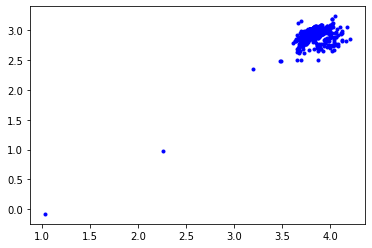

In [27]:
# Stochastic Gradient Descent w/ learning schedule w/o scikit-learn
import matplotlib.pyplot as plt

n_epochs = 50
t0, t1 = 5, 50
m = 100

def learning_schedule(t):
    return t0/(t + t1)

theta = np.random.randn(2,1)

# select m instances every epoch
for epoch in range(n_epochs):
    for i in range(m):
        random_idx =  np.random.randint(m)
        xi = X_b[random_idx:random_idx+1]
        yi = y[random_idx:random_idx+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i) # epoch * m + i = accumulated instance numbers
        theta = theta - eta * gradients
        
        plt.plot(theta[0], theta[1], "b.")
    
    if epoch % 5 == 0:
         print(f'eta: {eta:.5f}, theta: {theta[0]}, {theta[1]}')

plt.show()

In [32]:
# Stochastic Gradient Descent w/ scikit-learn
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=50, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel()) #ravel: flattening

sgd_reg.intercept_, sgd_reg.coef_
#intercept: The intercept term
#coef: Weights assigned to the features

(array([3.77503707]), array([2.99175798]))

3. Mini-batch Gradient Descent
    - Mini-batch Gradient Descent: Instead of full training set(Batch GD) or just one instance(Stochastic GD), based on small random sets of instances called mini-batches
    - Pos: be able to get a performance boost from hardware optimization of matrix operations. alg's progress in parameter space is less erratic than SGD especially with fairly large mini-batches



4. Conclusion  

|Algorithm| Large m(instance) | Out-of-core support | Large n(feature) | Hyperparams | Scaling required | Scikit-Learn|
|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
| `Normal Equation` | Fast | No | Slow | 0 | No | n/a |
| `SVD` | Fast | No | Slow | 0 | No | LinearRegression |
| `Batch GD` | Slow | No | Fast | 2 | Yes | SGDRegressor|
| `Stochastic GD` | Fast | Yes | Fast | ≥2 | Yes | SGDRegressor|
| `Mini-batch GD` | Fast | Yes | Fast | ≥2 | Yes | SGDRegressor|

## 4-3. Polynomial Regression

- be able to use linear model to fit nonlinear data **by adding powers of each feature a new features**
- PolynomialFeatures(degree=d) transforms an array containing n features into an array containing 
${\frac{(n+d)!}{d!n!}}$
    -> be careful w/ feature #

In [37]:
from sklearn.preprocessing import PolynomialFeatures

m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]
X_poly[0]

lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.09603788]), array([[0.99031658, 0.49535408]]))

## 4-4. Regualarized Linear Models

1. Ridge Regression
2. Lasso Regression
3. Elastic Net

## 4-5. Logistic Regression

## 4-6. Softmax Regression

## Bias and Variance

- **a model’s generalization error can be expressed as the sum of three very different errors**    


1. Bias: due to wrong assumptions such as assuming that the data is linear when it is actually quadratic. a high-bias model is most likely to underfit the training data.
2. Variance: due to the model’s excessive sensitivity to small variations in the training data. A model with many degrees of freedom(such as a high-degree polynomial model) is likely to have high variance, and thus to overfit the training data.
3. Irreducible error: due to the noisiness of the data itself. The only way to reduce this part of the error is to clean up the data (e.g., fix the data sources, such as broken sensors, or detect and remove outliers).


- Bias-variance tradeoff
    - Increasing a model’s complexity: typically increase its variance and reduce its bias. 
    - Reducing a model’s complexity: increases its bias and reduces its variance. 

## Early Stopping

- Measuring the model's generalization performance: **1) cross-validation, 2) learning curves**

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))
    
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.xlabel("Training set size")
    plt.ylabel("RMSE")
    plt.show()

lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

## Exercise

#### 1. What Linear Regression training algorithm can you use if you have a training set with millions of features?
batch gradient, stochastic gradient, mini-batch gradient
#### 2. Suppose the features in your training set have very different scales. What algorithms might suffer from this, and how? What can you do about it?
batch gradient, stochastic gradient, mini-batch gradient  
would take long time to converge  
scale features uing standardizing  
#### 3. Can Gradient Descent get stuck in a local minimum when training a Logistic Regression model?
#### 4. Do all Gradient Descent algorithms lead to the same model provided you let them run long enough?
yes
#### 5. Suppose you use Batch Gradient Descent and you plot the validation error at every epoch. If you notice that the validation error consistently goes up, what is likely going on? How can you fix this?
overfitting  
increase the number of train set or reduce the complexity of the model
#### 6. Is it a good idea to stop Mini-batch Gradient Descent immediately when the validation error goes up?
no, 
it is natural for validation error rate to go up at the beginning
#### 7. Which Gradient Descent algorithm (among those we discussed) will reach the vicinity of the optimal solution the fastest? Which will actually converge? How can you make the others converge as well?
mini-batch gradient descent
#### 8. Suppose you are using Polynomial Regression. You plot the learning curves and you notice that there is a large gap between the training error and the validation error. What is happening? What are three ways to solve this?

#### 9. Suppose you are using Ridge Regression and you notice that the training error and the validation error are almost equal and fairly high. Would you say that the model suffers from high bias or high variance? Should you increase the regularization hyperparameter α or reduce it?
#### 10. Why would you want to use: Ridge Regression instead of plain Linear Regression (i.e., without any regularization)?Lasso instead of Ridge Regression? Elastic Net instead of Lasso?
#### 11. Suppose you want to classify pictures as outdoor/indoor and daytime/nighttime. Should you implement two Logistic Regression classifiers or one Softmax Regression classifier?
#### 12. Implement Batch Gradient Descent with early stopping or Softmax Regression (without using ScikitLearn).